<a href="https://colab.research.google.com/github/kate-melnykova/NN_learnability/blob/main/GeneralizationNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# import packages
import random

import matplotlib.pyplot as plt
import numpy as np
from keras.models import Sequential
from keras.layers import Dense

Using TensorFlow backend.


# Generalization of NN
## Analyzing the idea in the paper
## UNDERSTANDING DEEP LEARNING REQUIRES RETHINKING GENERALIZATION
## by Chiyuan Zhang, Samy Bengio, Moritz Hardt, Benjamin Recht, Oriol Vinyals

Suppose we have trained the NN on the data generated with distribution $D$ and we want to apply it to make accurate predictions on $\widetilde{D}.$

In the talk, the speaker suggested to split $D$ into disjoint sets $D_1$ and $D_2$. Then, train the NN on $D_1$ and test it on $D_2$. If the NN does well on $D_2$, then it is likely to do well on $\widetilde{D}.$ 

It is stated that $D_1$ and $D_2$ are disjoint, but they also should be somehow separated. We need to clarify how exactly $D_1$ and $D_2$ are separated, we do NOT want $D_1$ and $D_2$ be as on the picture below.

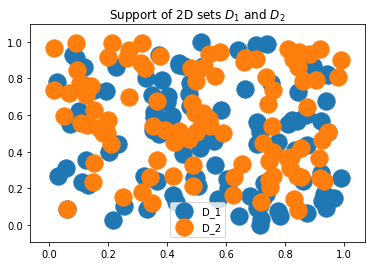

In [ ]:
x = [random.random() for _ in range(100)]
y = [random.random() for _ in range(100)]
plt.scatter(x, y, s=300, label='D_1')
x = [random.random() for _ in range(100)]
y = [random.random() for _ in range(100)]
plt.scatter(x, y, s=300, label='D_2')
plt.legend()
plt.title('Support of 2D sets $D_1$ and $D_2$')
plt.show()

In the example above, $D_1$ and $D_2$ are disjoint, but it's not the way we want to split the set $D=D_1\cup D_2$!

## Why $D_1$ and $D_2$ must be "separated"? What does it bring to the table?

Let us start from other side of the approximation. In statistics, one can analyze the distribution of the error and the mistakes in predictions should be more or less uniformly distributed over the domain (I don't remember exact terms)

For more concrete example, consider the function $f(x) = exp(x)$. Suppose that $D_1$ is a uniform distribution over $[-10, -1]$ and $D_2$ is a uniform distribution over $[2,3].$ The problem is that over most of $D_1$, the function $f(x)$ is almost flat. Many statistical tests that minimize the error would return a flat line. However, when we see that majority of errors occur closer to $-1$.

In [ ]:
model = Sequential()
model.add(Dense(3, input_dim=1, activation='relu'))
model.add(Dense(5, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

# compile the keras model
model.compile(loss='mean_squared_error',
              optimizer='sgd',
              metrics=['mae'])

In [ ]:
def f(x):
  return np.exp(x)

In [ ]:
# generate data
X = [random.uniform(-10, -1) for _ in range(1000)]
y = [f(x) for x in X]

In [ ]:
# fit the keras model on the dataset
model.fit(X, y, epochs=150, batch_size=10)




Epoch 1/150





1000/1000 [==============================] - 1s 779us/step - loss: 0.0069 - mean_absolute_error: 0.0672
Epoch 2/150
1000/1000 [==============================] - 0s 113us/step - loss: 0.0040 - mean_absolute_error: 0.0495
Epoch 3/150
1000/1000 [==============================] - 0s 99us/step - loss: 0.0026 - mean_absolute_error: 0.0389
Epoch 4/150
1000/1000 [==============================] - 0s 121us/step - loss: 0.0018 - mean_absolute_error: 0.0318
Epoch 5/150
1000/1000 [==============================] - 0s 117us/step - loss: 0.0013 - mean_absolute_error: 0.0271
Epoch 6/150
1000/1000 [==============================] - 0s 105us/step - loss: 0.0010 - mean_absolute_error: 0.0236
Epoch 7/150
1000/1000 [==============================] - 0s 100us/step - loss: 8.0806e-04 - mean_absolute_error: 0.0210
Epoch 8/150
1000/1000 [==============================] - 0s 95us/step - loss: 6.6358e-04 - mean_absolute_error: 0.0190
Epoch 9/150
1000/1000 [==============================] - 0

Let us see how the model works on $D_1\cup D_2.$

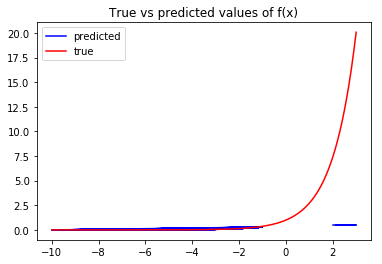

In [ ]:
# generate data
X_D = [random.uniform(-10, -1) for _ in range(1000)]
y_D = model.predict(X_D)
X_Dtilde = [random.uniform(2, 3) for _ in range(1000)]
y_Dtilde = model.predict(X_Dtilde)

x_trueD = np.arange(-10, 3, 0.001)
y_trueD = [f(x) for x in x_trueD]


plt.plot(X_D, y_D, 'b', label='predicted')
plt.plot(X_Dtilde, y_Dtilde, 'b')
plt.plot(x_trueD, y_trueD,'r', label='true')
plt.title('True vs predicted values of f(x)')
plt.legend()
plt.show()

As expected, the NN ignored "inconvenient" part near $-1$ and output function is close to zero. Therefore, it will not generalize well. To get the final confirmation of the distribution of the error, let us look on the error on each of points of $D_1.$

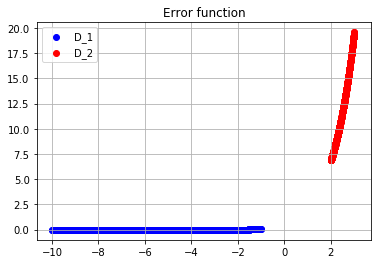

In [ ]:
err_D = np.subtract([f(x) for x in X_D], np.transpose(y_D))[0]
plt.scatter(X_D, err_D, c='blue', label='D_1')
err_Dtilde = np.subtract([f(x) for x in X_Dtilde], np.transpose(y_Dtilde))[0]
plt.scatter(X_Dtilde, err_Dtilde, c='red', label='D_2')
plt.title('Error function')
plt.grid()
plt.legend()
plt.show()

Clearly, the error does not look right from the approximation theory view.

What happens if we examine the error on $D_1$ only?

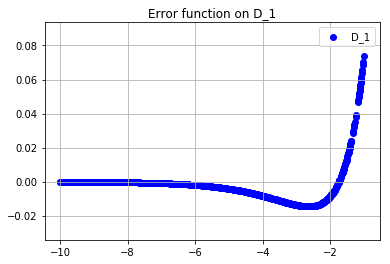

In [ ]:
plt.scatter(X_D, err_D, c='blue', label='D_1')
plt.title('Error function on D_1')
plt.grid()
plt.legend()
plt.show()

We could reach the same conclusion -- the error function is not looking good as an approximation function. In this specific example, we do not need $D_2$ to determine if the NN allows generalization.

## Future steps

Analyzing the error function in high dimensions is challenging. I'd like to review literature to ensure what distribution of error is expected and how to select the good sets $D_1$, $D_2$, $D_3$, ...

From practical perspective, I suggest creating clusters by using, say, K-means, and run statistical tests that ensure that the error distrubition on all sets is identical.

## Side note: if the NN is trained on both $D_1$ and $D_2$, will it do well on $D_3$?

In [ ]:
model = Sequential()
model.add(Dense(3, input_dim=1, activation='sigmoid'))
model.add(Dense(5, activation='tanh'))
model.add(Dense(1, activation='sigmoid'))

# compile the keras model
model.compile(loss='mean_squared_error',
              optimizer='sgd',
              metrics=['mse'])

In [ ]:
# sorry for bad-written code
X_both = X_D + X_Dtilde
y_both = [f(x) for x in X_both]
z = np.random.permutation(len(X_both))
#idx_train = list(z[:len(X_both)//2])
idx_train = list(z)
X_train = [X_both[idx] for idx in idx_train]
y_train = [y_both[idx] for idx in idx_train]

model.fit(np.array(X_train), np.array(y_train), epochs=150, batch_size=10)

Epoch 1/150
2000/2000 [==============================] - 0s 204us/step - loss: 78.1298 - mean_squared_error: 78.1298
Epoch 2/150
2000/2000 [==============================] - 0s 104us/step - loss: 77.2458 - mean_squared_error: 77.2458
Epoch 3/150
2000/2000 [==============================] - 0s 109us/step - loss: 77.1947 - mean_squared_error: 77.1947
Epoch 4/150
2000/2000 [==============================] - 0s 105us/step - loss: 77.1760 - mean_squared_error: 77.1760
Epoch 5/150
2000/2000 [==============================] - 0s 108us/step - loss: 77.1665 - mean_squared_error: 77.1665
Epoch 6/150
2000/2000 [==============================] - 0s 109us/step - loss: 77.1606 - mean_squared_error: 77.1606
Epoch 7/150
2000/2000 [==============================] - 0s 108us/step - loss: 77.1567 - mean_squared_error: 77.1567
Epoch 8/150
2000/2000 [==============================] - 0s 112us/step - loss: 77.1540 - mean_squared_error: 77.1540
Epoch 9/150
2000/2000 [==============================] - 0s 106u